In [35]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [3]:
n = 500
X,y = make_circles(n_samples=n, noise=0.02)

X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float).reshape(n, -1)

In [4]:
X[:5], y[:5]

(tensor([[ 0.0731, -1.0328],
         [-0.9271, -0.4019],
         [-0.7433,  0.6962],
         [ 0.1672, -0.9760],
         [-0.7230, -0.6477]]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]]))

C:\Users\musta\AppData\Local\Temp\ipykernel_9672\3894090802.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[:, 0][np.where(y==0)[0]], X[:, 1][np.where(y==0)[0]], c=col, label="Class 1")
C:\Users\musta\AppData\Local\Temp\ipykernel_9672\3894090802.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[:, 0][np.where(y==1)[0]], X[:, 1][np.where(y==1)[0]], c=co2, label="Class 2")


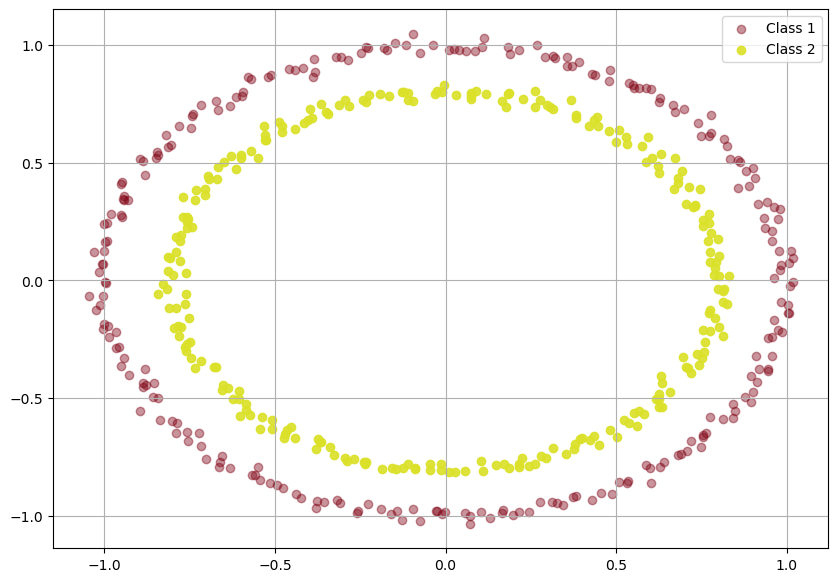

In [30]:
from itertools import cycle
cycol = cycle('bgrcmk')
col = (np.random.random(), np.random.random(), np.random.random(), np.random.random())
co2 = (np.random.random(), np.random.random(), np.random.random(), np.random.random())

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0][np.where(y==0)[0]], X[:, 1][np.where(y==0)[0]], c=col, label="Class 1")
plt.scatter(X[:, 0][np.where(y==1)[0]], X[:, 1][np.where(y==1)[0]], c=co2, label="Class 2")
plt.legend()
plt.grid()
plt.show()

In [75]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(2, 1024)
        self.hidden_1 = nn.Linear(1024, 1024)
        self.output= nn.Linear(1024, 1)
    
    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.hidden_1(x))
        x = self.output(x)
        return x

In [76]:
from sklearn.metrics import accuracy_score

def train_and_evaluate(X, y, lr, n_epochs):
    model = ANN()

    loss_func = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    for epoch in range(n_epochs):
        pred = model(X)
        loss = loss_func(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    predictions_prob = model(X).detach()
    predictions = (predictions_prob > 0).float()
    acc = accuracy_score(y, predictions)
    return model, predictions.detach(), acc

In [88]:
def plot_decision_boundary_contour(model, X, y, acc):
    
    x_min, x_max = X[:, 0].min().item() - .5, X[:, 0].max().item() + .5
    y_min, y_max = X[:, 1].min().item() - .5, X[:, 1].max().item() + .5
    h = 0.01
    
    # Coordinate matrices
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    tensor_for_pred = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    Z = model(tensor_for_pred).detach().reshape(xx.shape)
    Z_classes = (Z > 0).float()
    
    plt.figure(figsize=(10, 7))
    plt.title(f"Accuracy = {100 * acc}%")
    plt.contourf(xx, yy, Z_classes, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)

In [86]:
model, predictions, acc = train_and_evaluate(X, y, 0.01, 500)


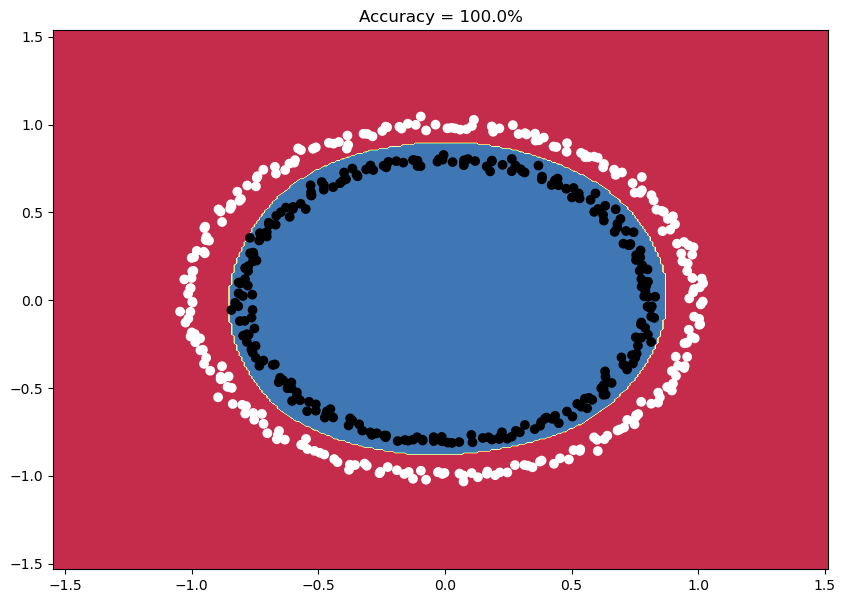

In [89]:
plot_decision_boundary_contour(model, X, y, acc)